In [1]:
import argparse
import pandas as pd
import numpy as np
from moltraffic.visualisations import *
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
from matplotlib.lines import Line2D

input_file = '../data/interim/minute_full_station_merged.csv'

df = pd.read_csv(input_file)

In [2]:
df

STM                                            DIR  Err  Mot  \
0         1010-188  Vozni pas : Bravnicarjeva > Ulica Jožeta Jame    /    0   
1         1010-188  Vozni pas : Bravnicarjeva > Ulica Jožeta Jame    /    0   
2         1010-188  Vozni pas : Bravnicarjeva > Ulica Jožeta Jame    /    0   
3         1010-188  Vozni pas : Bravnicarjeva > Ulica Jožeta Jame    /    0   
4         1010-188  Vozni pas : Bravnicarjeva > Ulica Jožeta Jame    /    0   
...            ...                                            ...  ...  ...   
20410681  1025-116     Prehitevalni pas: Gregorciceva > Erjavceva  ###    0   
20410682  1025-116     Prehitevalni pas: Gregorciceva > Erjavceva  ###    0   
20410683  1025-116     Prehitevalni pas: Gregorciceva > Erjavceva  ###    0   
20410684  1025-116     Prehitevalni pas: Gregorciceva > Erjavceva  ###    0   
20410685  1025-116     Prehitevalni pas: Gregorciceva > Erjavceva  ###    0   

          Osebni  BUS  LTov  STov  TTov  TSP  Vlac  OCC  GAP  VMIN  VAVG  \
0             22    0     1     0     0    0     0   12   35    42    58   
1             16    0     1     0     1    0     0    9   52    39    60   
2             12    1     1     1     0    0     0   10   61    30    55   
3              8    0     0     0     0    0     0    5  110    23    56   
4              6    0     1     0     0    0     0    3  128    51    58   
...          ...  ...   ...   ...   ...  ...   ...  ...  ...   ...   ...   
20410681       0    0     0     0     0    0     0    0    0     0     0   
20410682       0    0     0     0     0    0     0    0    0     0     0   
20410683       0    0     0     0     0    0     0    0    0     0     0   
20410684       0    0     0     0     0    0     0    0    0     0     0   
20410685       0    0     0     0     0    0     0    0    0     0     0   

          VMAX                 Time  \
0           75  2016-03-01 00:00:00   
1           90  2016-03-01 00:15:00   
2           66  2016-03-01 00:30:00   
3          103  2016-03-01 00:45:00   
4           68  2016-03-01 01:00:00   
...        ...                  ...   
20410681     0  2015-08-31 22:45:00   
20410682     0  2015-08-31 23:00:00   
20410683     0  2015-08-31 23:15:00   
20410684     0  2015-08-31 23:30:00   
20410685     0  2015-08-31 23:45:00   

                                                       FULL  NAME  SRC  
0         CSV:1010-188-Celovška250>Šentvid-Voznipas:Brav...  TODO  MER  
1         CSV:1010-188-Celovška250>Šentvid-Voznipas:Brav...  TODO  MER  
2         CSV:1010-188-Celovška250>Šentvid-Voznipas:Brav...  TODO  MER  
3         CSV:1010-188-Celovška250>Šentvid-Voznipas:Brav...  TODO  MER  
4         CSV:1010-188-Celovška250>Šentvid-Voznipas:Brav...  TODO  MER  
...                                                     ...   ...  ...  
20410681  CSV:1025-11a-SlovenskaDrama>Ajdovšèina-Prehite...  TODO  MER  
20410682  CSV:1025-11a-SlovenskaDrama>Ajdovšèina-Prehite...  TODO  MER  
20410683  CSV:1025-11a-SlovenskaDrama>Ajdovšèina-Prehite...  TODO  MER  
20410684  CSV:1025-11a-SlovenskaDrama>Ajdovšèina-Prehite...  TODO  MER  
20410685  CSV:1025-11a-SlovenskaDrama>Ajdovšèina-Prehite...  TODO  MER  

[20410686 rows x 20 columns]

In [3]:
selection = ['1010-188', '1040-236']
df.groupby('STM').mean()[['Mot', 'Osebni', 'BUS', 'LTov', 'STov', 'TTov', 'TSP', 'Vlac']].query('STM in @selection')

Mot      Osebni       BUS      LTov      STov      TTov  \
STM                                                                      
1010-188  0.515240  100.632606  1.331336  6.629610  0.644446  0.420452   
1040-236  0.476143   33.985846  0.321750  1.567619  0.166717  0.006800   

               TSP      Vlac  
STM                           
1010-188  0.269054  0.657299  
1040-236  0.202298  0.025711

In [4]:
df[['Mot', 'Osebni', 'BUS', 'LTov', 'STov', 'TTov', 'TSP', 'Vlac']].mean()

Mot        0.539455
Osebni    53.008211
BUS        0.934237
LTov       3.015888
STov       0.352912
TTov       0.225630
TSP        0.112722
Vlac       0.213053
dtype: float64

In [5]:
df1 = df.groupby('STM').mean().reset_index()
df1

STM        Mot      Osebni       BUS      LTov      STov      TTov  \
0   1001-156   0.376994   72.876390  1.184165  3.116356  0.263818  0.178365   
1   1002-17a   0.551275   74.255389  1.057330  3.457635  0.341628  0.129338   
2   1003-116   0.258859   42.164927  1.473862  2.156049  0.125131  0.124459   
3   1004-136   0.219541   37.000771  1.370240  1.967889  0.131167  0.108514   
4   1005-23a   0.246557   88.008667  0.667177  7.479739  0.813868  0.630896   
5   1006-22a   0.501163   76.714037  0.076476  6.544748  0.886219  0.601827   
6   1007-126   0.228005   55.757806  0.295354  2.278319  0.150485  0.092728   
7   1008-14a   0.330549   54.751898  0.314408  2.542556  0.150345  0.049701   
8   1009-168   0.477619   84.366275  1.456642  6.575074  0.635306  0.339190   
9   1010-188   0.515240  100.632606  1.331336  6.629610  0.644446  0.420452   
10  1011-216   0.631562   55.507438  0.726446  3.798979  0.297715  0.191170   
11  1012-236   0.281005   48.470652  0.318954  1.652347  0.068493  0.046647   
12  1013-176   0.244062   63.879243  1.436906  3.112301  0.188784  0.291244   
13  1014-156   0.322232   71.756565  1.224349  3.500361  0.356109  0.125428   
14  1015-126   0.234613   58.878505  1.074897  3.277949  0.232444  0.127469   
15  1016-146   0.265403   64.505921  1.081273  3.531494  0.287952  0.119509   
16  1017-246   0.290752   58.803720  0.396210  3.512150  0.367070  0.337003   
17  1018-166   0.277125   52.198198  0.924633  2.357783  0.123873  0.126814   
18  1019-186   0.266659   51.920066  0.989595  2.431747  0.149202  0.126471   
19  1021-156   0.407679   78.543028  1.446414  5.348720  0.387664  0.735629   
20  1022-176   0.367308   78.816651  1.344515  4.644286  0.354133  0.559110   
21  1023-266   0.147442   55.258188  0.083160  3.805828  0.272181  0.397349   
22  1025-116   0.245133   23.772499  3.490712  1.222737  0.063496  0.034700   
23  1026-136   0.272621   22.607604  3.341399  1.093538  0.065357  0.023699   
24  1027-166   0.455814   78.803108  3.103399  3.804556  0.265998  0.129241   
25  1028-180   0.664908   82.712149  3.200701  4.190681  0.227889  0.121768   
26  1029-246   0.363849   85.165168  1.089464  4.110162  0.388362  0.284172   
27  1030-246   0.174383   44.707016  0.747503  3.668347  0.622877  0.828857   
28  1032-246   0.542517   15.839665  1.555244  0.999200  0.068563  0.029568   
29  1034-216   0.281769   78.818102  1.319303  3.755824  0.285802  0.215967   
30  1035-136   0.388024   74.860054  3.011394  2.972903  0.338641  0.143320   
31  1036-116   0.435812   66.759826  2.885869  3.432960  0.216383  0.092462   
32  1038-276   0.459240   35.188946  0.013293  1.557012  0.052869  0.034661   
33  1039-266   0.524158   64.696571  0.409910  3.478783  0.400451  0.037071   
34  1040-236   0.476143   33.985846  0.321750  1.567619  0.166717  0.006800   
35  1041-256   0.261660   35.578006  0.884317  3.267800  0.459530  0.831372   
36  1042-225   0.299303   54.276297  0.144256  0.018427  1.677392  0.004311   
37  1043-246   0.195190   27.207477  0.027467  1.348925  0.085728  0.101042   
38  1044-24a   0.228452   65.643075  0.908833  6.436197  1.430023  0.932192   
39  1045-216   0.140975   32.322254  0.513106  1.978776  0.173525  0.158952   
40  1046-134   0.283695   58.870120  0.702209  1.197979  0.507738  0.069595   
41  1047-114   0.279937   63.489680  0.676857  1.631519  0.772256  0.086010   
42  1048-136   0.448031   44.235901  3.772627  2.637382  0.130743  0.039415   
43  1049-116   0.438702   47.536134  4.090907  2.817632  0.165732  0.060554   
44  1050-23a   0.290967   43.817352  0.279786  3.476215  0.647282  0.291423   
45  1051-23a   0.311899   38.953215  0.690457  3.213256  1.178289  0.727987   
46  1052-21a   0.215410   36.256605  0.766460  1.807558  0.109789  0.045663   
47  1053-266   0.254358   43.886145  0.387717  2.464401  0.338572  0.113617   
48  1054-276   0.346155   29.212534  0.217700  2.056511  0.120766  0.109765   
49  1055-166   0.252432   24.395761  2.346726  1.407763  0.

In [6]:
def sort_stations_by_traffic_sum(ndf):
    ndf['SUM'] = ndf['Mot'] + ndf['Osebni'] + ndf['BUS'] + ndf['LTov']  + ndf['STov'] + ndf['TTov'] + ndf['TSP'] + ndf['Vlac']
    ndf = ndf.sort_values(by=['SUM'])
    ndf = ndf.drop(columns=['SUM'])
    return ndf

ndf = df[['STM', 'Osebni', 'LTov', 'BUS', 'Mot', 'STov', 'TTov', 'Vlac', 'TSP']].groupby('STM').mean().reset_index()
ndf = sort_stations_by_traffic_sum(ndf)

In [7]:
ndf

STM      Osebni      LTov       BUS        Mot      STov      TTov  \
58   1946-23    0.000000  0.000000  0.000000   3.069233  0.000000  0.000000   
51  1057-256    6.211065  0.414704  0.001907   0.074474  0.052549  0.034385   
57  1935-238    0.005523  0.000000  0.000000  10.517360  0.000000  0.000000   
54  1060-256   16.045218  1.089687  0.579051   0.228650  0.084438  0.082321   
28  1032-246   15.839665  0.999200  1.555244   0.542517  0.068563  0.029568   
23  1026-136   22.607604  1.093538  3.341399   0.272621  0.065357  0.023699   
49  1055-166   24.395761  1.407763  2.346726   0.252432  0.079975  0.058944   
22  1025-116   23.772499  1.222737  3.490712   0.245133  0.063496  0.034700   
37  1043-246   27.207477  1.348925  0.027467   0.195190  0.085728  0.101042   
48  1054-276   29.212534  2.056511  0.217700   0.346155  0.120766  0.109765   
55  1061-286   32.202921  1.847939  0.106876   0.243263  0.146383  0.137300   
39  1045-216   32.322254  1.978776  0.513106   0.140975  0.173525  0.158952   
34  1040-236   33.985846  1.567619  0.321750   0.476143  0.166717  0.006800   
50  1056-186   32.268208  1.772103  2.381450   0.204823  0.120548  0.057491   
32  1038-276   35.188946  1.557012  0.013293   0.459240  0.052869  0.034661   
46  1052-21a   36.256605  1.807558  0.766460   0.215410  0.109789  0.045663   
3   1004-136   37.000771  1.967889  1.370240   0.219541  0.131167  0.108514   
35  1041-256   35.578006  3.267800  0.884317   0.261660  0.459530  0.831372   
45  1051-23a   38.953215  3.213256  0.690457   0.311899  1.178289  0.727987   
2   1003-116   42.164927  2.156049  1.473862   0.258859  0.125131  0.124459   
47  1053-266   43.886145  2.464401  0.387717   0.254358  0.338572  0.113617   
44  1050-23a   43.817352  3.476215  0.279786   0.290967  0.647282  0.291423   
11  1012-236   48.470652  1.652347  0.318954   0.281005  0.068493  0.046647   
42  1048-136   44.235901  2.637382  3.772627   0.448031  0.130743  0.039415   
27  1030-246   44.707016  3.668347  0.747503   0.174383  0.622877  0.828857   
43  1049-116   47.536134  2.817632  4.090907   0.438702  0.165732  0.060554   
18  1019-186   51.920066  2.431747  0.989595   0.266659  0.149202  0.126471   
53  1059-246   51.388553  2.937758  0.720400   0.248365  0.331869  0.271009   
17  1018-166   52.198198  2.357783  0.924633   0.277125  0.123873  0.126814   
36  1042-225   54.276297  0.018427  0.144256   0.299303  1.677392  0.004311   
52  1058-25a   52.596116  3.183217  0.703780   0.601635  0.281415  0.160327   
56  1062-21a   51.926575  3.188208  1.869030   0.510062  0.156954  0.056480   
7   1008-14a   54.751898  2.542556  0.314408   0.330549  0.150345  0.049701   
6   1007-126   55.757806  2.278319  0.295354   0.228005  0.150485  0.092728   
21  1023-266   55.258188  3.805828  0.083160   0.147442  0.272181  0.397349   
10  1011-216   55.507438  3.798979  0.726446   0.631562  0.297715  0.191170   
40  1046-134   58.870120  1.197979  0.702209   0.283695  0.507738  0.069595   
16  1017-246   58.803720  3.512150  0.396210   0.290752  0.367070  0.337003   
14  1015-126   58.878505  3.277949  1.074897   0.234613  0.232444  0.127469   
41  1047-114   63.489680  1.631519  0.676857   0.279937  0.772256  0.086010   
12  1013-176   63.879243  3.112301  1.436906   0.244062  0.188784  0.291244   
33  1039-266   64.696571  3.478783  0.409910   0.524158  0.400451  0.037071   
15  1016-146   64.505921  3.531494  1.081273   0.265403  0.287952  0.119509   
31  1036-116   66.759826  3.432960  2.885869   0.435812  0.216383  0.092462   
13  1014-156   71.756565  3.500361  1.224349   0.322232  0.356109  0.125428   
0   1001-156   72.876390  3.116356  1.184165   0.376994  0.263818  0.178365   
38  1044-24a   65.643075  6.436197  0.908833   0.228452  1.430023  0.932192   
1   1002-17a   74.255389  3.457635  1.057330   0.551275  0.341628  0.129338   
30  1035-136   74.860054  2.972903  3.011394   0.388024  0.338641  0.143320   
29  1034-216   78.818102  3.755824  1.319303   0.281769  0.

In [8]:
ndf = ndf.rename(columns={'Mot': 'Motorcycle', 'Osebni': 'Passenger car', 'BUS': 'Bus', 'LTov': 'Light truck', 'STov': 'Medium truck', 'TTov': 'Heavy truck', 'TSP': 'Semi-trailer truck', 'Vlac': 'Tractor unit'})

In [9]:
ndf

STM  Passenger car  Light truck       Bus  Motorcycle  Medium truck  \
58   1946-23       0.000000     0.000000  0.000000    3.069233      0.000000   
51  1057-256       6.211065     0.414704  0.001907    0.074474      0.052549   
57  1935-238       0.005523     0.000000  0.000000   10.517360      0.000000   
54  1060-256      16.045218     1.089687  0.579051    0.228650      0.084438   
28  1032-246      15.839665     0.999200  1.555244    0.542517      0.068563   
23  1026-136      22.607604     1.093538  3.341399    0.272621      0.065357   
49  1055-166      24.395761     1.407763  2.346726    0.252432      0.079975   
22  1025-116      23.772499     1.222737  3.490712    0.245133      0.063496   
37  1043-246      27.207477     1.348925  0.027467    0.195190      0.085728   
48  1054-276      29.212534     2.056511  0.217700    0.346155      0.120766   
55  1061-286      32.202921     1.847939  0.106876    0.243263      0.146383   
39  1045-216      32.322254     1.978776  0.513106    0.140975      0.173525   
34  1040-236      33.985846     1.567619  0.321750    0.476143      0.166717   
50  1056-186      32.268208     1.772103  2.381450    0.204823      0.120548   
32  1038-276      35.188946     1.557012  0.013293    0.459240      0.052869   
46  1052-21a      36.256605     1.807558  0.766460    0.215410      0.109789   
3   1004-136      37.000771     1.967889  1.370240    0.219541      0.131167   
35  1041-256      35.578006     3.267800  0.884317    0.261660      0.459530   
45  1051-23a      38.953215     3.213256  0.690457    0.311899      1.178289   
2   1003-116      42.164927     2.156049  1.473862    0.258859      0.125131   
47  1053-266      43.886145     2.464401  0.387717    0.254358      0.338572   
44  1050-23a      43.817352     3.476215  0.279786    0.290967      0.647282   
11  1012-236      48.470652     1.652347  0.318954    0.281005      0.068493   
42  1048-136      44.235901     2.637382  3.772627    0.448031      0.130743   
27  1030-246      44.707016     3.668347  0.747503    0.174383      0.622877   
43  1049-116      47.536134     2.817632  4.090907    0.438702      0.165732   
18  1019-186      51.920066     2.431747  0.989595    0.266659      0.149202   
53  1059-246      51.388553     2.937758  0.720400    0.248365      0.331869   
17  1018-166      52.198198     2.357783  0.924633    0.277125      0.123873   
36  1042-225      54.276297     0.018427  0.144256    0.299303      1.677392   
52  1058-25a      52.596116     3.183217  0.703780    0.601635      0.281415   
56  1062-21a      51.926575     3.188208  1.869030    0.510062      0.156954   
7   1008-14a      54.751898     2.542556  0.314408    0.330549      0.150345   
6   1007-126      55.757806     2.278319  0.295354    0.228005      0.150485   
21  1023-266      55.258188     3.805828  0.083160    0.147442      0.272181   
10  1011-216      55.507438     3.798979  0.726446    0.631562      0.297715   
40  1046-134      58.870120     1.197979  0.702209    0.283695      0.507738   
16  1017-246      58.803720     3.512150  0.396210    0.290752      0.367070   
14  1015-126      58.878505     3.277949  1.074897    0.234613      0.232444   
41  1047-114      63.489680     1.631519  0.676857    0.279937      0.772256   
12  1013-176      63.879243     3.112301  1.436906    0.244062      0.188784   
33  1039-266      64.696571     3.478783  0.409910    0.524158      0.400451   
15  1016-146      64.505921     3.531494  1.081273    0.265403      0.287952   
31  1036-116      66.759826     3.432960  2.885869    0.435812      0.216383   
13  1014-156      71.756565     3.500361  1.224349    0.322232      0.356109   
0   1001-156      72.876390     3.116356  1.184165    0.376994      0.263818   
38  1044-24a      65.643075     6.436197  0.908833    0.228452      1.430023   
1   1002-17a      74.255389     3.457635  1.057330    0.551275      0.341628   
30  1035-136      74.860054     2.972903  3.011394    0.388024      0.338641   
29  1034-

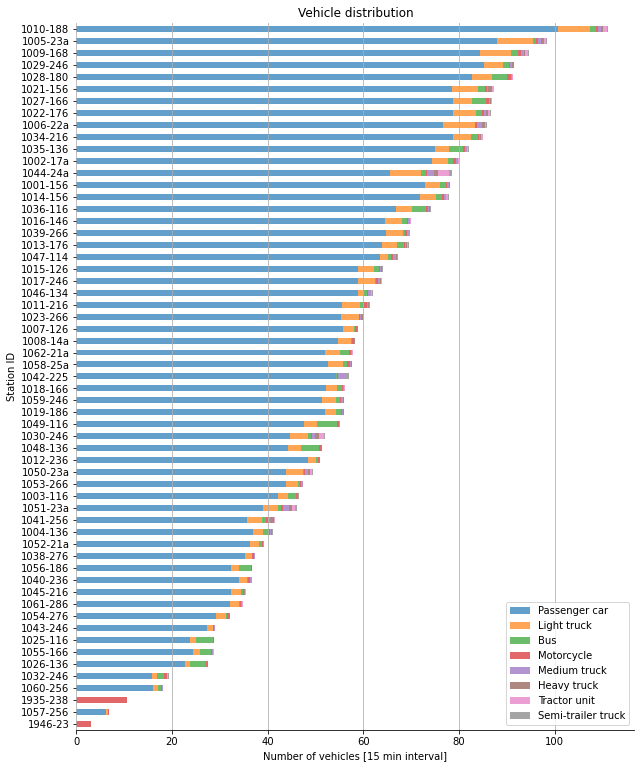

In [10]:
ndf.plot(
    x = 'STM',
    kind = 'barh',
    stacked = True,
    title = 'Vehicle distribution',
    mark_right = True,
    figsize=(10,13),
    alpha=0.7)

sns.despine(left=True, bottom=False)
#plt.grid()

plt.gca().xaxis.grid(True)
plt.xlabel('Number of vehicles [15 min interval]')
plt.ylabel('Station ID')

plt.savefig(f'vehicle_type.pdf', bbox_inches='tight', pad_inches=0)